# Taller de Análisis de Texto con Tweets en Español

Este taller guía a los estudiantes en el análisis de tweets en español, usando técnicas de limpieza de texto, análisis de frecuencia de palabras y análisis de sentimientos. También incluye preguntas orientadas al negocio.

In [2]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv

--2025-05-07 21:22:35--  https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv [following]
--2025-05-07 21:22:36--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205292 (200K) [text/plain]
Saving to: ‘Gender_bias_spanish.csv’

Gender_bias_s

## 1. Configuración e Importación de Librerías
Primero, importaremos las librerías necesarias y cargaremos el conjunto de datos.

In [3]:
!pip install nltk textblob wordcloud
import pandas as pd
import re
from nltk.corpus import stopwords
from textblob import TextBlob
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Cargar el Conjunto de Datos
Cargamos el archivo CSV que contiene los tweets y las etiquetas ('biased' o 'non-biased').

In [4]:
# Cargar el conjunto de datos (reemplazar 'ruta/del/archivo.csv' con la ruta del archivo real)
tweets = pd.read_csv('Gender_bias_spanish.csv')
pd.set_option('display.max_rows', None)
print(tweets.head(15))

                                             Contents       Label
0   @chumeltorres ya cabrón! sin tí se reciben las...      biased
1   ¿alguien es tan amable de ir a hacerme la comp...  non-biased
2   @jenniferduquee hahaha, si está rico, nadamas ...  non-biased
3   @evagelcot donde lo ves!!? es mi programa favo...  non-biased
4   como siempre mi tortilla triunfa mas que otros...  non-biased
5      yo solo quiero a alguien que odie a7x conmigo   non-biased
6   mi mamá cumple años hoy. y este es uno de los ...  non-biased
7   @pvaya @sailor_tesserei @sh3rrymh es que es un...  non-biased
8   #eneneroyo estaré más al pendiente de mi famil...  non-biased
9   @yolanday_y @el_pais tras 72.000 años de viaje...  non-biased
10  pocas maneras mejores se me ocurren para empez...  non-biased
11  @soyalannavarro buenas noches risitas ...sueña...  non-biased
12  @she_ra_h @darinasilver ya me habían hecho pix...  non-biased
13  yo esperaba encontrar un boleto para ir al par...  non-biased
14  yo man

## 2. Exploración de Datos
Exploraremos el conjunto de datos para entender mejor la distribución de etiquetas y las características de los tweets.

In [5]:
tweets['Label'].value_counts()

,count
Label,
non-biased,1596
biased,318


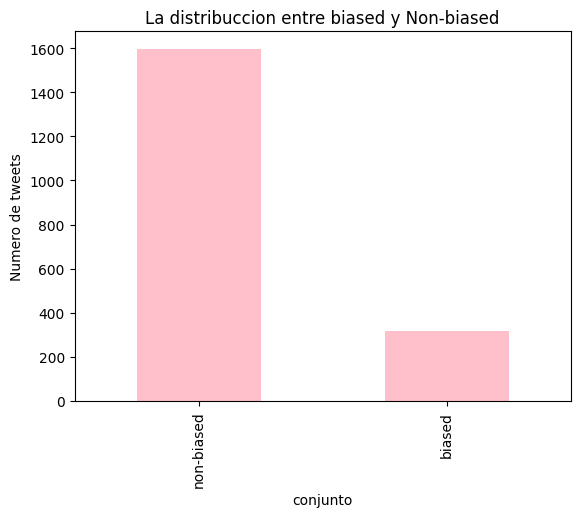

In [6]:
tweets['Label'].value_counts().plot(kind='bar', color='pink')
plt.xlabel('conjunto')
plt.ylabel('Numero de tweets')
plt.title('La distribuccion entre biased y Non-biased')
plt.show()

In [7]:
correlacion=tweets['Label'].value_counts(normalize=True)
print(correlacion)

Label
non-biased    0.833856
biased        0.166144
Name: proportion, dtype: float64


**Pregunta:** ¿Qué proporción de tweets son 'biased' y 'non-biased'? ¿Por qué podría ser importante esta proporción para el análisis de texto?

# Proporción de tweets


*   Biased                16.6%
*   Non-Biased            83.4%

Esta proporción es muy importante ya que podemos visualizar que porcentaje de personas podrian estar "sesgadas", la gran mayoria no lo están y/p quiénes conservan una posición neutra frente a sus comentarios.


## 3. Preprocesamiento de Texto
Realizamos una serie de pasos para limpiar y preparar el texto para el análisis: limpieza de caracteres especiales, conversión a minúsculas, y eliminación de stopwords.

In [8]:
def limpiar_texto(texto):
    texto = str(texto).lower()
    texto = re.sub(r'http\S+', '', texto)
    texto = re.sub(r'@\w+', '', texto)
    texto = re.sub(r'[^a-záéíóúüñ\s]', '', texto)
    texto = re.sub(r'\s+', ' ', texto).strip()
    palabras = texto.split()
    palabras_limpias = [p for p in palabras if p not in stop_words]
    return ' '.join(palabras_limpias) #string limpio

In [9]:
tweets['Texto_limpio'] = tweets['Contents'].apply(limpiar_texto)


print(tweets[['Contents', 'Texto_limpio']].head(10))

                                            Contents  \
0  @chumeltorres ya cabrón! sin tí se reciben las...   
1  ¿alguien es tan amable de ir a hacerme la comp...   
2  @jenniferduquee hahaha, si está rico, nadamas ...   
3  @evagelcot donde lo ves!!? es mi programa favo...   
4  como siempre mi tortilla triunfa mas que otros...   
5     yo solo quiero a alguien que odie a7x conmigo    
6  mi mamá cumple años hoy. y este es uno de los ...   
7  @pvaya @sailor_tesserei @sh3rrymh es que es un...   
8  #eneneroyo estaré más al pendiente de mi famil...   
9  @yolanday_y @el_pais tras 72.000 años de viaje...   

                                        Texto_limpio  
0  cabrón tí reciben noticias colchoncito puro ch...  
1  alguien tan amable ir hacerme compra mañana ba...  
2          hahaha si rico nadamas falta presentación  
3  ves programa favorito sólo encuentro temporada...  
4          siempre tortilla triunfa mas platos playa  
5                solo quiero alguien odie ax conmigo 

## 4. Análisis de Frecuencia de Palabras por Etiqueta
Contamos las palabras en tweets 'biased' y 'non-biased' y visualizamos las palabras más comunes.

In [11]:
tweets['Texto_limpio'] = tweets['Texto_limpio'].apply(lambda x: re.sub(r"[\'\[\],.]", "", x))
tweets['Texto_limpio'] = tweets['Texto_limpio'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)
biased_words = tweets[tweets['Label'] == 'biased']['Texto_limpio'].sum()
nonbiased_words = tweets[tweets['Label'] == 'non-biased']['Texto_limpio'].sum()

biased_freq = Counter(biased_words)
nonbiased_freq = Counter(nonbiased_words)

Text(0.5, 1.0, "Palabras más comunes en tweets 'non-biased'")

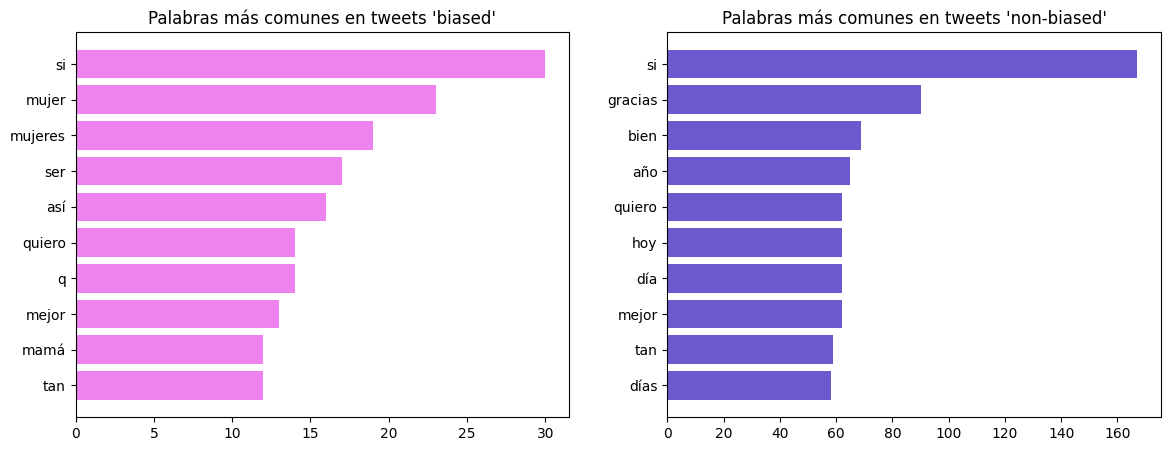

In [12]:
tweets['Texto_limpio'] = tweets['Texto_limpio'].astype(str)
biased_words = tweets[tweets['Label'] == 'biased']['Texto_limpio'].str.split().sum()
biased_freq = Counter(biased_words)
nonbiased_words = tweets[tweets['Label'] == 'non-biased']['Texto_limpio'].str.split().sum()
nonbiased_freq = Counter(nonbiased_words)

top_biased = biased_freq.most_common(10)
top_nonbiased = nonbiased_freq.most_common(10)

palabras_biased, freqs_biased = zip(*top_biased)
palabras_nonbiased, freqs_nonbiased = zip(*top_nonbiased)


fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].barh(palabras_biased[::-1], freqs_biased[::-1], color='violet')
axs[0].set_title("Palabras más comunes en tweets 'biased'")

axs[1].barh(palabras_nonbiased[::-1], freqs_nonbiased[::-1], color='slateblue')
axs[1].set_title("Palabras más comunes en tweets 'non-biased'")

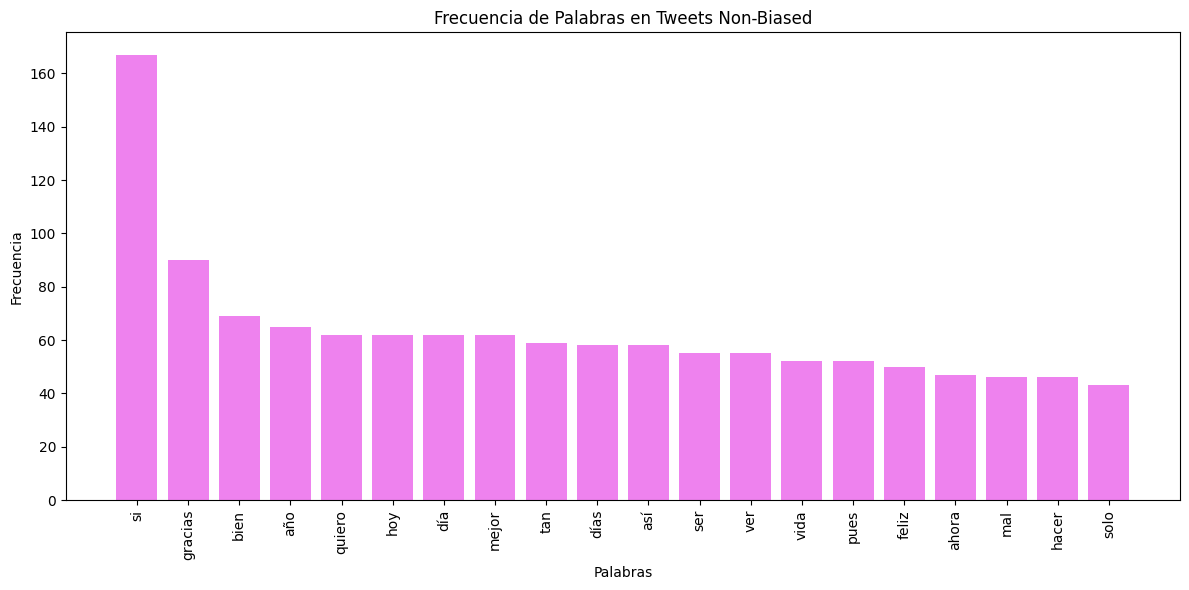

In [13]:
top_palabras = nonbiased_freq.most_common(20)
palabras, conteos = zip(*top_palabras)
plt.figure(figsize=(12, 6))
plt.bar(palabras, conteos, color='violet')
plt.title('Frecuencia de Palabras en Tweets Non-Biased')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

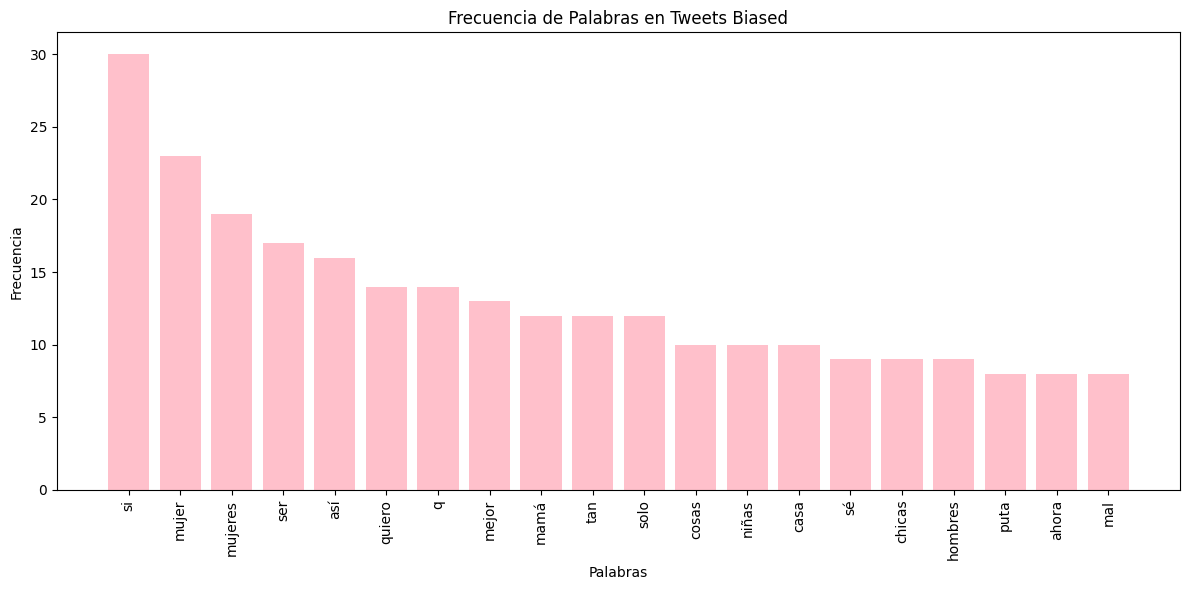

In [14]:
top_palabras = biased_freq.most_common(20)
palabras, conteos = zip(*top_palabras)
plt.figure(figsize=(12, 6))
plt.bar(palabras, conteos, color='pink')
plt.title('Frecuencia de Palabras en Tweets Biased')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Preguntas de Análisis de Frecuencia:**
- ¿Qué palabras son más comunes en los tweets 'biased' en comparación con los 'non-biased'?
- ¿Hay palabras que sugieran un sesgo en los tweets etiquetados como 'biased'?
- ¿Cómo podrían usar las empresas esta información para entender mejor las opiniones sesgadas?

**Las 5 palabras biased más comunes en compraracion con los non-biased**
- Puta
- Mujer
- Mamá
- Niñas
- Casa


Esto deja que ver estos twitteros utiliza palabras despectivan, tratan a las mujeres como un objeto y no tienen ni respeto, ni decencia humana cuando se refieren a ellas. Ahí se puede entender que sus conversación no tienen un punto de vista positivom vemos la forma en como se dirigen sobre un tema, y cual es su léxico más utilizado además de ignorar algunas palabras poco relevantes. Pero lo que más destacada es que parece ser una comunidad machista y misógena ya que solo hablan de las mujeres de forma desagradable o morbosa.




## 5. Análisis de Sentimientos
Usaremos `TextBlob` para calcular el sentimiento de cada tweet y luego compararemos la distribución de sentimientos entre tweets 'biased' y 'non-biased'.

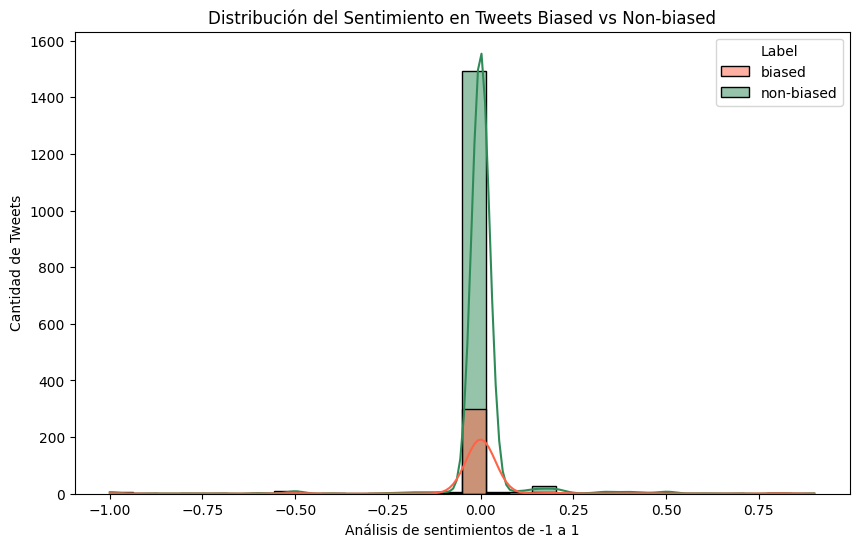

In [20]:
def obtener_polaridad(texto):
    try:
        return TextBlob(texto).sentiment.polarity
    except:
        return 0

tweets['Sentimiento'] = tweets['Texto_limpio'].apply(obtener_polaridad)

plt.figure(figsize=(10,6))
sns.histplot(data=tweets, x='Sentimiento', hue='Label', kde=True, bins=30, palette=['tomato', 'seagreen'])
plt.title("Distribución del Sentimiento en Tweets Biased vs Non-biased")
plt.xlabel("Análisis de sentimientos de -1 a 1")
plt.ylabel("Cantidad de Tweets")
plt.show()

In [16]:
biased_avg = tweets[tweets['Label'] == 'biased']['Sentimiento'].mean()
nonbiased_avg = tweets[tweets['Label'] == 'non-biased']['Sentimiento'].mean()

print(f"Promedio sentimiento biased: {biased_avg:.3f}")
print(f"Promedio sentimiento non-biased: {nonbiased_avg:.3f}")

Promedio sentimiento biased: 0.001
Promedio sentimiento non-biased: 0.002


**Preguntas de Análisis de Sentimientos:**
- ¿Existe una diferencia notable en los sentimientos de tweets 'biased' vs 'non-biased'?
- ¿Qué indica esta diferencia sobre la naturaleza de los tweets sesgados?
- ¿Cómo podrías aplicar el análisis de sentimientos para entender la percepción del público sobre un tema específico?

No, ya que representan una poca cantidad de tweets con sentimientos, asimismo,
los tweet sesgados podrian indicar que:


*   Tienen una intención más negativa y/0 sarcástica.
*   Usan lenguaje emocional para reforzar su sesgo.
*   Provocan una reacción negativa más que informar o hablar de otros temas.


Se podria aplicar este análisis para:


*   Filtrar las palabras con mayor sentimiento.
*   Ver que sentimientos genera la publicación.
*   Como cambia el sentimiento con el tiempo.






## 6. Visualización con Nube de Palabras
Usamos una nube de palabras para visualizar las palabras más comunes en cada conjunto de tweets.

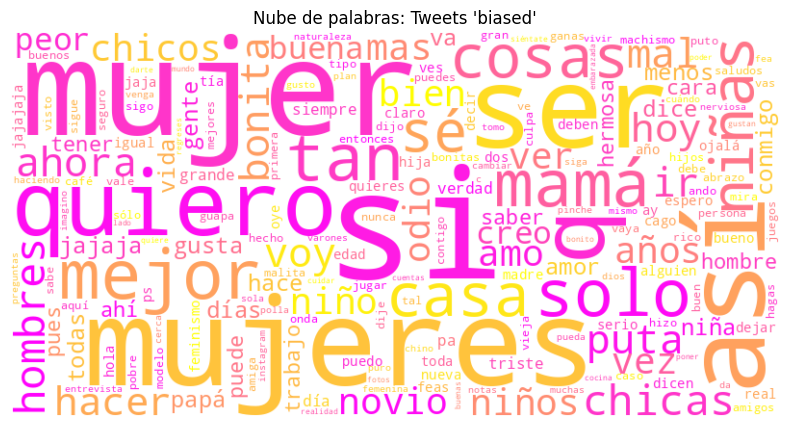

In [17]:
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='spring'
).generate_from_frequencies(biased_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nube de palabras: Tweets 'biased'")
plt.show()

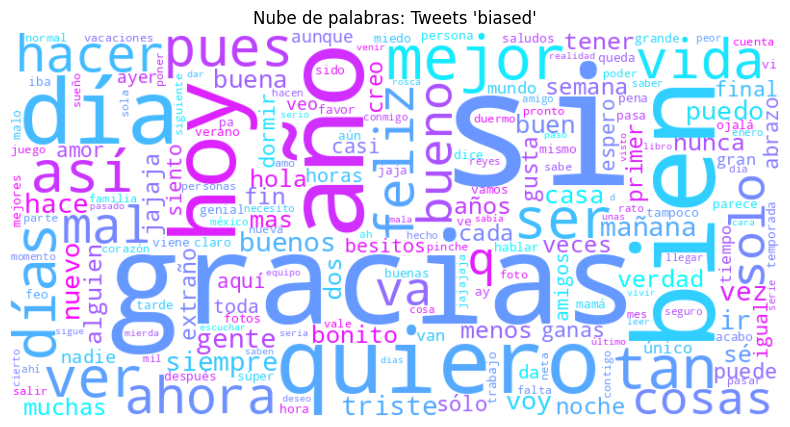

In [18]:
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='cool'
).generate_from_frequencies(nonbiased_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nube de palabras: Tweets 'biased'")
plt.show()

## 7. Conclusiones y Perspectiva de Negocios
En este taller, hemos explorado cómo el análisis de texto puede ofrecer información valiosa sobre el contenido y el sentimiento de los tweets. Reflexionemos sobre algunas preguntas de negocio:
- ¿Cómo podría utilizarse este análisis para mejorar la comunicación de la marca?
- ¿Qué ajustes se podrían hacer en una campaña de marketing si los tweets son predominantemente 'biased'?
- ¿Qué patrones importantes se podrían explorar en un análisis futuro (e.g., análisis de tendencias a lo largo del tiempo)?

Para la primera pregunta, al identificar el lenguaje positivo o negativo asociado a la marca nos ayuda a tener un diagnóstico. Por otro lado, los términos que aparecen frecuentemente en tweets con sentimiento negativo, se pueden empezar evitar ese lenguaje o responder de manera más empática. Asimismo, se puede ajustar el tono del contenido: si los mensajes neutros o con lenguaje emocionalmente positivo generan más engagement, puede orientarse la comunicación hacia ese estilo. Finalmente, se puede monitorear en tiempo real esta estrategia, por lo que una marca puede detectar crisis o malentendidos a través de picos de tweets sesgados o negativos.

En la segunda pregunta los ajustes que se pueden hacer comienzan desde la revisión de los mensajes, un alto volumen de tweets biased puede indicar que el mensaje fue percibido como polémico o parcial, e jnclusive machista o misógeno.

De igual forma, si se llegó al público objetivo no deseado se debe realinear este target ya puede que el mensaje pudo haber sido malinterpretado por un grupo no hace parte de lo que busca la marca, por ende, dismunir el uso de palabras negativas hace que el algoritmo lo muestre al verdadero público. Por último, se pueden implementar acciones sobre la reputación de la marca, como manual de crisis, comunicados de prensa o contenido neutro.

Para la tercera pregunta, los patrones que se pueden explorar para un análisis futuro puede ser tendencias a lo largo del tiempo, ya que se puede observar cómo varía el sentimiento antes, durante y después de una campaña que haga la marca. Asimismo, se puede hacer un análisis por temas, identificar cuáles son los temas que más polarizan a mi público al igual que una segmentación por usuario para identificar quiénes tienden a compartir contenido biased y cómo se comportan. Finalmente, se puede hacer un análisis de redes donde los retweets y menciones ayudan a identificar si estos contenidos están influenciando positiva o negativamente.